In [1]:

import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import loadmat   
from coastal_tools import nearest_point_cartesian

In [2]:
cases = ["1perc", "2perc", "5perc", "10perc", "20perc", "50perc"]
scenario = "Restored"
scenario_out = "no_alt"

outfile  = 'test.tif'

# input file names
gridfile = r'C:\Users\tkalra\Desktop\NFWP_Swan_coral_USVirgin\69532_Coral_Reefs_St_Croix\Grid\restored_USVI_rasterio.tif'
input_directory = r'C:\Users\tkalra\Desktop\NFWP_Swan_coral_USVirgin\69532_Coral_Reefs_St_Croix\Swan_Runs'
output_directory = r'C:\Users\tkalra\Desktop\NFWP_Swan_coral_USVirgin\69532_Coral_Reefs_St_Croix\Swan_final\Flood_depth'

In [3]:
# Loop over the filenames in the directory
#for i, case in enumerate(cases):
case = '1perc'
#matfile = f'{input_directory}\{scenario}_Reef\{case}\{case}_restored_outs.mat'
matfile_single = f'{input_directory}\{scenario}_Reef\{case}\{case}_restored_outs.mat'

# find the x and y point in the south close to the land and one close to the ocean boundary to do v&v 
x_s = 392000
y_s = 192750

x_n = 392000 
y_n = 195000

matfile= loadmat(matfile_single)
    
#print(matfile)
xx=matfile["Xp"]
yy=matfile["Yp"]
#xx_2d = np.transpose(xx)
#yy_2d = np.transpose(yy)
point = [x_s, y_s]
idx_s = nearest_point_cartesian(xx, yy, point)
point = [x_n, y_n]
idx_n = nearest_point_cartesian(xx, yy, point)

In [4]:
 
xx_s = (xx[idx_s[0], idx_s[1]])
yy_s = (yy[idx_s[0], idx_s[1]])

xx_n = xx[idx_n[0], idx_n[1]]
yy_n = yy[idx_n[0], idx_n[1]]

#print(xx(idx_s[0], idx_s[1]))
#idx_s[1]

In [5]:
#print(xx_s, yy_s)
print(idx_n[0], idx_n[1])
print(idx_s[0], idx_s[1])

261 217
37 217


In [6]:
# Loop over the filenames in the directory
Hs_south_restored_list = []
Hs_north_restored_list = []

Hs_south_degraded_list = []
Hs_north_degraded_list = []

Setup_south_restored_list = []
Setup_south_degraded_list = []

print(cases)
print(scenario)
for i, case in enumerate(cases):
    url = f'{input_directory}\Restored_Reef\{case}\{case}_restored_outs.mat'
    #print(matfile)
    matfile= loadmat(url)
    xp = matfile["Xp"]
    yp = matfile["Yp"]
    Hs_restored=matfile["Hsig"]
    Setup_restored = matfile["Setup"]

    url = f'{input_directory}\Degraded_Reef\{case}\{case}_degraded_outs.mat'
    #print(matfile)
    matfile= loadmat(url)
    Hs_degraded=matfile["Hsig"]
    Setup_degraded = matfile["Setup"]

    Hs_s = Hs_restored[idx_s[0], idx_s[1]]
    Hs_n = Hs_restored[idx_n[0], idx_n[1]]
    Hs_south_restored_list.append(Hs_s)
    Hs_north_restored_list.append(Hs_n)

    Hs_s = Hs_degraded[idx_s[0], idx_s[1]]
    Hs_n = Hs_degraded[idx_n[0], idx_n[1]]
    Hs_south_degraded_list.append(Hs_s)
    Hs_north_degraded_list.append(Hs_n)
    
    Setup_s = Setup_restored[idx_s[0], idx_s[1]]
    Setup_south_restored_list.append(Setup_s) 

    Setup_s = Setup_degraded[idx_s[0], idx_s[1]]
    Setup_south_degraded_list.append(Setup_s) 


['1perc', '2perc', '5perc', '10perc', '20perc', '50perc']
Restored


In [7]:
#print(Hs_north_restored_list)
#print(Hs_south_restored_list)
#print(Hs_north_degraded_list)
#print(Hs_south_degraded_list)
print(Setup_south_degraded_list)
print(Setup_south_restored_list)

[0.14252223, 0.13083154, 0.10345519, 0.08063533, 0.056936797, -0.0015704958]
[0.14594227, 0.13315716, 0.10395234, 0.080007486, 0.0558529, -0.0015265836]


C:\Users\tkalra\AppData\Local\Temp\ipykernel_36648\2993122781.py:4: RuntimeWarning: invalid value encountered in subtract
  diff = Hs_restored - Hs_degraded
C:\Users\tkalra\AppData\Local\Temp\ipykernel_36648\2993122781.py:5: RuntimeWarning: invalid value encountered in subtract
  C = plt.pcolor(xp, yp, Hs_restored-Hs_degraded, cmap='viridis')#, vmin = -0.1, vmax = 0.1)
C:\Users\tkalra\AppData\Local\Temp\ipykernel_36648\2993122781.py:7: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  cbar = plt.colorbar(C)


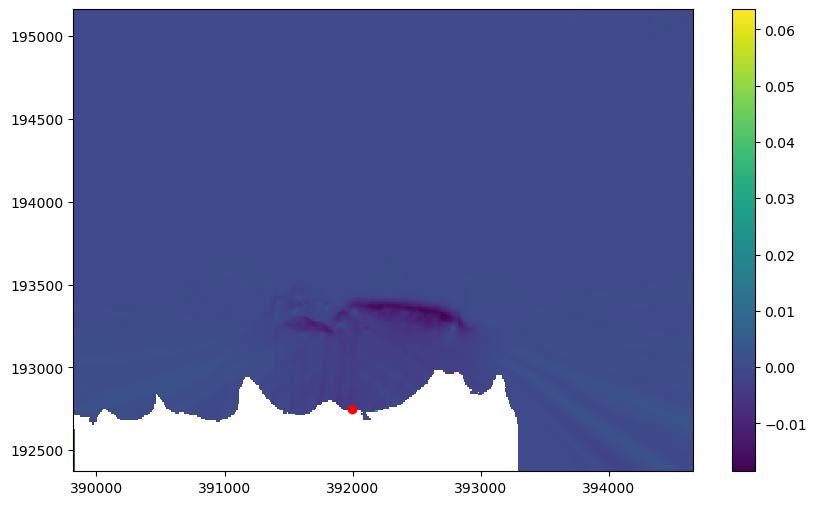

In [8]:
x_s = 395000
y_s = 192800
plt.figure(figsize=(10,6))
diff = Hs_restored - Hs_degraded
C = plt.pcolor(xp, yp, Hs_restored-Hs_degraded, cmap='viridis')#, vmin = -0.1, vmax = 0.1)
plt.plot(xx_s, yy_s, 'ro')
cbar = plt.colorbar(C)
#plt.title('Difference bet. Hs restored - degraded (meters)')
#plt.savefig('point_to_plot.png')
 

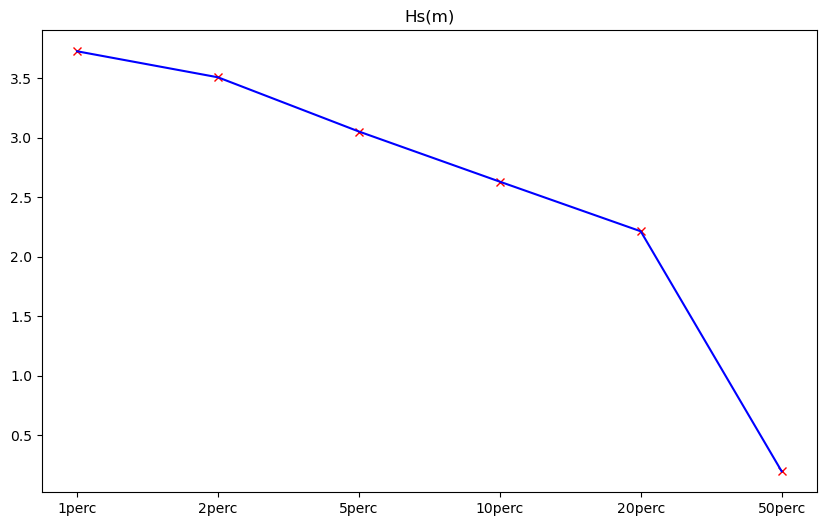

In [9]:
plt.figure(figsize=(10,6))
#diff = Hs_restored - Hs_degraded
plt.plot(cases,Hs_north_degraded_list, 'rx')
plt.plot(cases,Hs_north_restored_list, 'b-')
plt.title("Hs(m)")
plt.savefig('Hs_north.png')


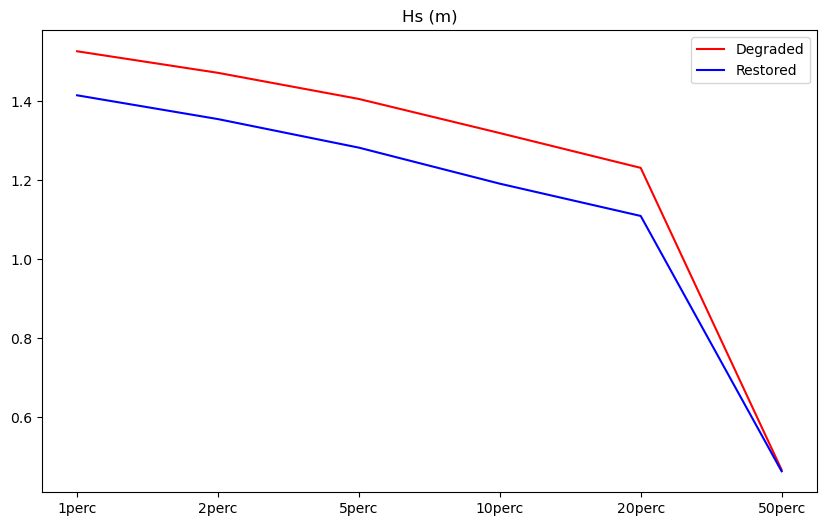

In [10]:
plt.figure(figsize=(10,6))
#diff = Hs_restored - Hs_degraded
plt.plot(cases,Hs_south_degraded_list, 'r-',label = 'Degraded')
plt.plot(cases,Hs_south_restored_list, 'b-',label = 'Restored')
#plt.ylabel('Se')
plt.legend()
plt.title("Hs (m)")
plt.savefig('Hs_south_point.png')



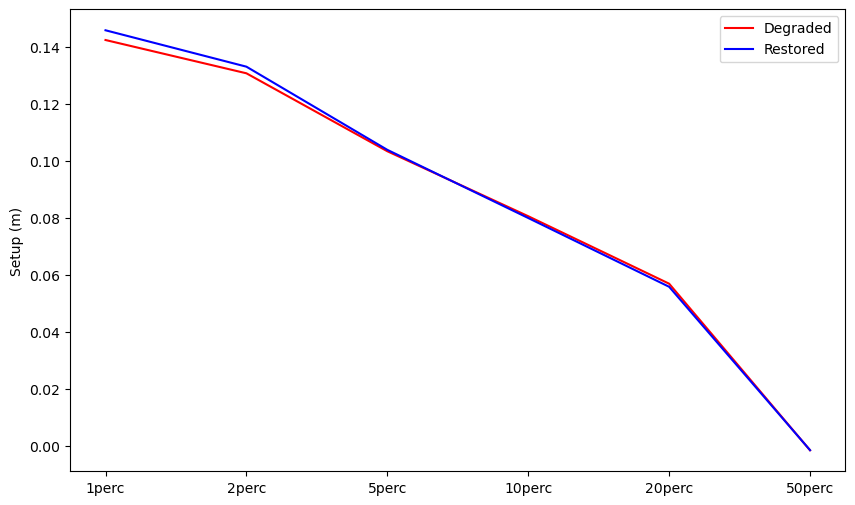

In [11]:
plt.figure(figsize=(10,6))
#diff = Hs_restored - Hs_degraded
plt.plot(cases,Setup_south_degraded_list, 'r-', label='Degraded')
plt.plot(cases,Setup_south_restored_list, 'b-', label='Restored')
plt.ylabel('Setup (m)')
plt.legend()
plt.savefig('Setup_south_point.png')


In [15]:
Hs_deg = [1.655, 4.396, 4.7035, 5.033, 5.3119, 5.5278]
Hs_rest = [1.6459, 3.9039, 4.1961, 4.521, 4.8027, 5.0189]
Hs_perc = Hs_deg

In [21]:
for i in range(0, len(Hs_deg)):
    Hs_perc[i]= 100*(Hs_rest[i] - Hs_deg[i])/Hs_deg[i]

In [22]:
print(Hs_perc)

[-0.5498489425981938, -11.194267515923562, -10.787711278834903, -10.1728591297437, -9.586023833279992, -9.206194145953177]


In [ ]:
Hs_perc